In [4]:
#nltk.download("punkt")
df = pd.read_csv("news_corpus_processed.csv")

tokenized_news = [nltk.word_tokenize(doc) for doc in df['Synopsis']]
tokenized_news

[['uri',
  'box',
  'offic',
  'collect',
  'action',
  'star',
  'vicki',
  'kaushal',
  'becom',
  'first',
  'mid',
  'rang',
  'film',
  'cross',
  'r',
  'crore',
  'aditya',
  'dhar',
  'directori',
  'revolv',
  'around',
  'indian',
  'militari',
  'surgic',
  'strike',
  'terror',
  'launch',
  'pad',
  'pakistan'],
 ['dosti',
  'ke',
  'side',
  'effect',
  'box',
  'offic',
  'collect',
  'day',
  'sapna',
  'choudhari',
  'film',
  'expect',
  'decent',
  'busi',
  'box',
  'offic',
  'sinc',
  'sapna',
  'fairli',
  'popular',
  'celebr',
  'particularli',
  'northern',
  'part',
  'countri'],
 ['late',
  'ranveer',
  'singh',
  'struck',
  'gold',
  'box',
  'offic',
  'look',
  'back',
  'box',
  'offic',
  'perform',
  'last',
  'five',
  'releas'],
 ['gulli',
  'boy',
  'box',
  'offic',
  'predict',
  'accord',
  'girish',
  'johar',
  'gulli',
  'boy',
  'loos',
  'base',
  'life',
  'mumbai',
  'street',
  'rapper',
  'naezi',
  'divin',
  'set',
  'cash',
  'regist

In [5]:
len(tokenized_news)

4654

In [9]:
len(news_vector[1])

21

In [62]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = tokenized_news
# train model
model_1 = Word2Vec(sentences, size=300, min_count=1)

# fit a 2d PCA model to the vectors
X = model_1[model_1.wv.vocab]
pca = PCA(n_components=200)#dimensions reduced
result = pca.fit_transform(X)
# create a scatter plot of the projection
"""
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()
"""

<ipython-input-62-68710cdda8f4>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model_1[model_1.wv.vocab]


'\npyplot.scatter(result[:, 0], result[:, 1])\nwords = list(model_1.wv.vocab)\nfor i, word in enumerate(words):\n    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))\npyplot.show()\n'

In [65]:
len(result[0])

300

In [29]:
X

array([[ 1.1676647e-03, -4.8521101e-03, -8.2029253e-03, ...,
        -5.7002564e-04,  3.2403672e-03,  1.3944358e-03],
       [ 1.4399838e-01, -3.5748342e-01, -6.3090765e-01, ...,
        -1.6122352e-01,  3.7373766e-01,  4.5464747e-02],
       [ 1.5485823e-01, -4.0014654e-01, -6.7521578e-01, ...,
        -1.5960616e-01,  3.8861951e-01,  4.9043383e-02],
       ...,
       [ 1.0545374e-03, -4.4981972e-04, -1.1881080e-03, ...,
         1.0082595e-03,  7.9912250e-04,  5.7925994e-04],
       [ 2.0166810e-03, -2.6097940e-03, -5.0357319e-03, ...,
        -8.9483050e-04,  2.4581363e-03,  8.3410693e-04],
       [ 1.1403492e-03, -4.5617702e-03, -3.6921662e-03, ...,
         1.5573724e-03,  4.0596309e-03, -1.2482076e-04]], dtype=float32)

In [31]:
model_1

In [35]:
len(X[1])

300

In [36]:
len(result[1])

100

1
2
3
4
5
6
7
8
9


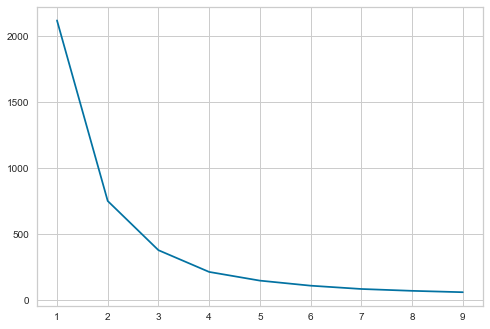

In [85]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def clustering(news_vector):
    distance_from_centroid = []
    for i in range(1, 10):
        kmeans = KMeans(n_clusters=i,init = 'k-means++', max_iter=400, n_init=15, random_state=0).fit(news_vector)
        #kmeans.fit(vector)
        print(i)
        distance_from_centroid.append(kmeans.inertia_)
    plt.plot(range(1, 10), distance_from_centroid)
    plt.show()
    return kmeans

def clustering1(news_vector):
    from sklearn.metrics import silhouette_score

    no_of_clusters = [2, 3, 4, 5, 6,7,8,9,10]
    s = []
    for n_clusters in no_of_clusters:
        cluster = KMeans(n_clusters = n_clusters)
        cluster_labels = cluster.fit_predict(news_vector)
        silhouette_avg = silhouette_score(news_vector, cluster_labels)
        s.append(silhouette_avg)
        print("For no of clusters =", n_clusters,
              " The average silhouette_score is :", silhouette_avg)
    plt.plot(no_of_clusters, s)
    plt.show()
    
kmeans = clustering(result)

In [88]:

km = KMeans(n_clusters=8,init = 'k-means++').fit(result)
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = model_1.wv.index2word
true_k = 8
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :100]:
        print(' %s' % terms[ind], end=',')
    print()
    
#clusters not good


Top terms per cluster:
Cluster 0:
 day, india, offic, must, first, event, coronaviru, increas, like, made, u, appl, three, lockdown, actor, order, travel, two, fit, took, answer, price, stand, see, polici, step, note, iphon, nation, seen, minist, love, septemb, number, million, second, way, lead, year, polit, film, unit, may, seri, june, galaxi, go, return, statement, mission, howev, key, month, receiv, support, gener, becom, challeng, well, last, perform, caus, level, data, today, recent, foreign, say, mani, share, sport, featur, compani, govern, talk, week, one, race, smartphon, claim, place, sever, expect, period, make, work, offer, date, former, posit, much, regist, test, fund, trump, friday, conduct, deal, celebr, look,
Cluster 1:
 r, caus, releas, june, week, case, tri, event, bse, bank, current, iphon, august, base, go, back, come, u, avail, win, mark, star, last, return, chang, order, book, test, stand, announc, actor, import, turn, still, top, instagram, see, minist, air, supp

/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


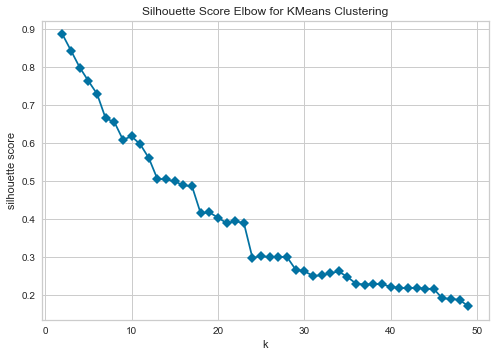

In [89]:
from yellowbrick.cluster import KElbowVisualizer
def silhouette_curve(model,X):  
    # Instantiate the KElbowVisualizer with the number of clusters and the metric 
    visualizer = KElbowVisualizer(model, k=(2,50), metric='silhouette', timings=False)

    # Fit the data and visualize
    visualizer.fit(X)    
    visualizer.poof() 
    
silhouette_curve(kmeans,result)

In [ ]:
# word2vec rejected...no good clusters formed